In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import sys
import config

sys.path.append('model_building/create_image_folders.py')
from model_building.create_image_folders import * 
sys.path.append('model_building/keras_model.py')
from model_building.keras_model import *

import warnings
warnings.simplefilter("ignore", UserWarning)


## Load Data

In [2]:
## Set paths
img_folder = "/home/jovyan/my_work/QB/image/images/"
train_img = "/home/jovyan/my_work/QB/image/train/"
val_img = "/home/jovyan/my_work/QB/image/val/"
labels_image = "data/x-ai_data.csv"

## Create Subfolder

Use the fonction "subfolders" to do the same thing as the cells below, DO NOT run it twice to avoid duplicates

In [36]:
train = labels_image.loc[labels_image['split']=='train']
val = labels_image.loc[labels_image['split']=='validation']

In [37]:
train0 = train.loc[train['class']==0]
train1 = train.loc[train['class']==1]

val0 = val.loc[val['class']==0]
val1 = val.loc[val['class']==1]


In [41]:
#Move TRAIN images labeled 0 to the correct folder

for i in train0.index:
    im = cv2.imread(img_folder+train0.loc[i,'filename'])
    cv2.imwrite(train_img + '0/' +train0.loc[i,'filename'], im)
#Move TRAIN images labeled 1 to the correct folder
for i in train1.index:
    im = cv2.imread(img_folder+train1.loc[i,'filename'])
    cv2.imwrite(train_img+'1/' +train1.loc[i,'filename'], im)

In [40]:
#Move val images labeled 0 to the correct folder
for i in val0.index:
    im = cv2.imread(img_folder+val0.loc[i,'filename'])
    cv2.imwrite(val_img + '0/' +val0.loc[i,'filename'], im)
#Move val images labeled 1 to the correct folder
for i in val1.index:
    im = cv2.imread(img_folder+val1.loc[i,'filename'])
    cv2.imwrite(val_img+'1/' +val1.loc[i,'filename'], im)

In [63]:
import shutil

#Remove hidden file
shutil.rmtree("image/train/.ipynb_checkpoints")
shutil.rmtree("image/val/.ipynb_checkpoints")

## Model

In [5]:
## Train and Val dataset
train_ds = train_set(train_img, config.image_size, config.batch_size)
val_ds = val_set(val_img, config.image_size, config.batch_size)

Found 1399 files belonging to 2 classes.
Using 1330 files for training.
Found 400 files belonging to 2 classes.
Using 20 files for validation.


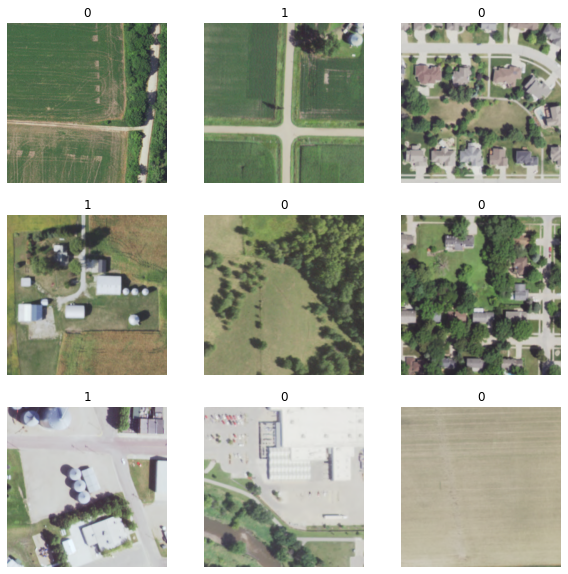

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [6]:
## Model
model = make_model(input_shape=config.image_size + (3,), num_classes=2)

In [7]:
train_model(model, train_ds, val_ds, config.number_epochs)

Epoch 1/50


2022-12-06 09:58:01.196635: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8204
2022-12-06 09:58:01.707190: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-06 09:58:01.709841: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-06 09:58:01.709893: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-12-06 09:58:01.712877: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-06 09:58:01.712985: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


42/42 [==============================] - 16s 277ms/step - loss: 0.6339 - accuracy: 0.6902 - val_loss: 0.6924 - val_accuracy: 0.6000


/opt/conda/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 2/50
42/42 [==============================] - 10s 244ms/step - loss: 0.4927 - accuracy: 0.7880 - val_loss: 0.6805 - val_accuracy: 0.6500
Epoch 3/50
42/42 [==============================] - 10s 243ms/step - loss: 0.4571 - accuracy: 0.8083 - val_loss: 0.6598 - val_accuracy: 0.6500
Epoch 4/50
42/42 [==============================] - 10s 243ms/step - loss: 0.4245 - accuracy: 0.8075 - val_loss: 0.6557 - val_accuracy: 0.6500
Epoch 5/50
42/42 [==============================] - 11s 273ms/step - loss: 0.4098 - accuracy: 0.8451 - val_loss: 0.6471 - val_accuracy: 0.6500
Epoch 6/50
42/42 [==============================] - 10s 243ms/step - loss: 0.3799 - accuracy: 0.8376 - val_loss: 0.6667 - val_accuracy: 0.6500
Epoch 7/50
42/42 [==============================] - 10s 244ms/step - loss: 0.3679 - accuracy: 0.8406 - val_loss: 0.6761 - val_accuracy: 0.6500
Epoch 8/50
42/42 [==============================] - 10s 245ms/step - loss: 0.3190 - accuracy: 0.8677 - val_loss: 0.8305 - val_accuracy: 0.6500

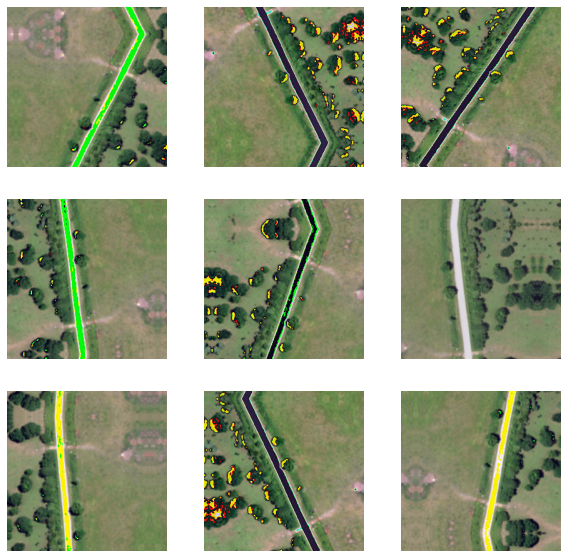

In [53]:
#visualize data augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.1),
        layers.RandomContrast([0,1]),
        layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
    ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")